Para analizar la información importaremos la libreria de pandas y con la funcion dtypes se mostraran todas las variables del csv y veremos que clase de datos y sale algún object tendremos que cambiarlo a una variable cuantitativa

In [78]:
import pandas as pd
datos = pd.read_csv("A1.5-Calificaciones.csv")
print(datos.dtypes)

Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


Ahora con la libereria de numpy y la funcion get_dumies convertiremos todas aquellas variables que tenian datos de tipo objecto a valores booleanos siendo false que no son pertenecientes al _ que tengan a la derecha del nombre

In [79]:
import numpy as np 
datos = pd.get_dummies(datos, drop_first=True)
print(datos.head(5))

   Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
0    18               2           0       6   5   6   6       False   False   
1    17               2           0       4   5   5   6       False   False   
2    15               2           3      10   7   8  10       False   False   
3    15               3           0       2  15  14  15       False   False   
4    16               2           0       4   6  10  10       False   False   

   Internet_yes  
0         False  
1          True  
2          True  
3          True  
4         False  


Aplicaremos el método de Tukey con k=3 a la variririable "Faltas", asi que para esto utilizaremos la funcion quantile de 0.25 y 0.75 y realizaremos el metodo.

A su vez con la funcion where de numpy determinaremos los datos atipicos de la variables con el booleano OR para asi saber cuales son los datos que debemos prestar mas atencion sobre esta variable. Lo iimprimiremos con la funcion iloc de los datos de nuestra variable out para que solo nos muestre los datos atipicos.

A su vez con el comando reset_index podremos borrar estos datos atipicos si asi lo deseamos.

In [80]:
q1=datos.Faltas.quantile(0.25)
q3=datos.Faltas.quantile(0.75)
iqr=q3-q1
li=q1-(3*iqr)
ls=q3+(3*iqr)
out=np.where((datos.Faltas<=li) | (datos.Faltas>=ls))[0]
print(datos.iloc[out,:])
print("Viendo los datos se observa que las cantidades de faltas con bastantes a comparacion a las demas es claro pensar que estos")
print("datos fueron mal escritos o fue una excepcion a la regla para el beneficio de los alumnos, puesto que si tuvieran tantas")
print("faltas no podrian seguir en la escuela, por lo que decidimos borrar estos valores atipicos")
datos = datos.drop(out).reset_index(drop=True)

     Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
74     16               2           0      54  11  12  11       False   False   
183    17               2           0      56   9   9   8       False   False   
276    18               2           0      75  10   9   9       False   False   
307    19               1           1      38   8   9   8       False    True   
315    19               3           1      40  13  11  11       False   False   

     Internet_yes  
74           True  
183          True  
276          True  
307          True  
315          True  
Viendo los datos se observa que las cantidades de faltas con bastantes a comparacion a las demas es claro pensar que estos
datos fueron mal escritos o fue una excepcion a la regla para el beneficio de los alumnos, puesto que si tuvieran tantas
faltas no podrian seguir en la escuela, por lo que decidimos borrar estos valores atipicos


Importaremos la libreria seaborn y matplotlib para poder graficar el heatmap.

Empezaremos usando la funcion corr() de pandas parra solo aceptar numeros solamente y siendo absolutos para no tener erores, lo siguiente sera conviertir la tabla a un arreglo de números usando la funcion to_numpy().copy() para agilizar este proceso y el comando np.fill_diagonal para colocar 0 en la ecuacion y que no tengamos trampas en el codigo.

En las variables i y j usaremos np.argmax el cual busca el número más grande en todo el arreglo todo esto dentro de la funcion np.unravel_index que asignara los valores tanto para i y j. Luego usamos esos i y j para imprimir qué dos columnas son las más parecidas y cuánto (ρ).

Para finalizar imprimiremoos el heatmap coon un poco de estetica y que se muestran sus valores para que sea mas facil de analizar.

Par más correlacionado: G2 <-> G3  |  ρ = 0.9047966735871248


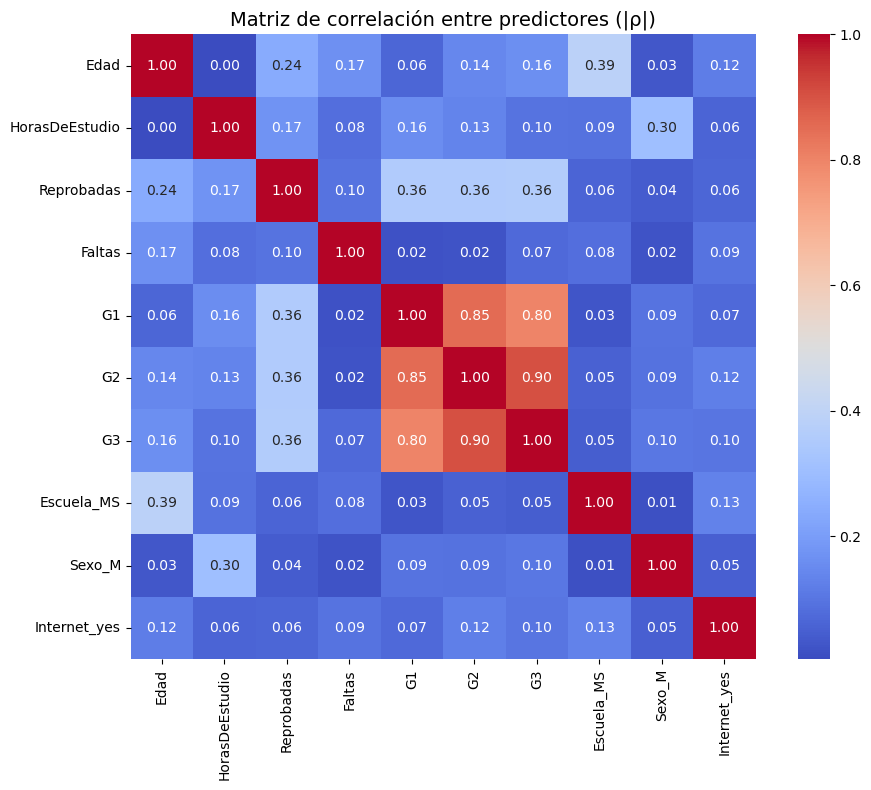

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
correlacion=datos.corr(numeric_only=True).abs()
corr_no_diag = correlacion.to_numpy().copy()
np.fill_diagonal(corr_no_diag, 0)
i,j=np.unravel_index(np.argmax(corr_no_diag), corr_no_diag.shape)
columnas=correlacion.columns
print("Par más correlacionado:", columnas[i], "<->", columnas[j], " |  ρ =", correlacion.iloc[i, j])

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, cmap="coolwarm", annot=True, fmt=".2f", cbar=True, square=True,
            xticklabels=columnas, yticklabels=columnas)
plt.title("Matriz de correlación entre predictores (|ρ|)", fontsize=14)
plt.tight_layout()
plt.show()

En base al heatmap decidimos que no es suficiente correlacion para eliminar variables que no nos importan analizar asi que proceguimos.

Utilizaremos la funcion train_test_split de la libreria sklearn.model_selection para poder dividir los datos en entrenamieneto y prueba. Est lo haremos coon respecto a G3 puesto a que es la variable de las calificaciones finales que deseamos anlizar en una proporcion 80 a 20.

Insertaremos 2 pares de variables que considero quue tienen gran significado de correlacion, esto coon eel comando insert y lo aplicaremos tanto para los datos de prueba coomo ppara los de entrenamiento. Juntaremos G1 y G2, y a su vez Reprobadas con Faltas.

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(datos.drop("G3",axis=1),datos.G3,train_size = 0.8)

X_train.insert(6,"G1 y G2",X_train.G1*X_train.G2)
X_test.insert(6,"G1 Y G2",X_test.G1*X_test.G2)
X_train.insert(4,"Reprobadas Y Faltas",X_train.Reprobadas*X_train.Faltas)
X_test.insert(4,"Reprobadas Y Faltas",X_test.Reprobadas*X_test.Faltas)
X_train.head()
X_test.head()

,Edad,HorasDeEstudio,Reprobadas,Faltas,Reprobadas Y Faltas,G1,G2,G1 Y G2,Escuela_MS,Sexo_M,Internet_yes
104,15,4,0,10,0,10,11,110,False,False,False
2,15,2,3,10,30,7,8,56,False,False,True
243,16,1,0,6,0,18,18,324,False,True,True
204,16,2,3,5,15,7,7,49,False,False,True
87,16,2,1,12,12,11,10,110,False,True,True


Con la libreria statsmodels.api realizaremos un alisis de la informacion de estos datos y ver su optimizacion en cuanto a una regresion.
Empezaremos  dividiendo y conviertiendo en arreglos de tipo float tanto a X_train como a Y_train gracias al comando asarray de numpy, despues realizaremos un modelos con el comando OLS() y lo haremos fit() para una mejor visualizacion y lo imprimiremos.

Para para poder graficar estos datos usaremos un scatter, pero noo sin antes tener un yHat utilizando la funcion predict, para a su vez graficar una linea roja para poder vis

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.6
Date:                Thu, 28 Aug 2025   Prob (F-statistic):          7.79e-116
Time:                        00:30:23   Log-Likelihood:                -630.62
No. Observations:                 312   AIC:                             1285.
Df Residuals:                     300   BIC:                             1330.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9201      1.913      1.527      0.1

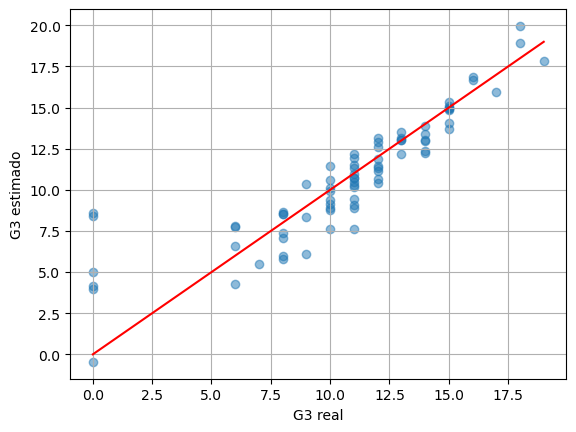


Como podemos analizar viendoo los datos de P-value la variable numero 7 es la mas significativa puesto a que es la unica
que es menor a 0.05 y esta hace referencia a el G2 siendo asi que este analisis podria ser mejor si juntaramos esta variable
con mas variables y se podria mejorar el R^2 aunque ya es bastante bueno superando el 0.820 como minimo llegando mas del 0.840
Esto tambien lo comprobamos en la grafica puesto a que la mayoria de los datos de G3 estimado contra G3 real son casi lineales
Por lo que podemos concluir que este experimento fue bastante bueno con las vairables y datos que quitamos o no quitamos.


In [90]:
import statsmodels.api as sm
X_train_array = np.asarray(X_train, dtype=float)
Y_train_array = np.asarray(Y_train, dtype=float)
model = sm.OLS(Y_train_array,sm.add_constant(X_train_array))
results = model.fit()
print(results.summary())

yHat=results.predict(sm.add_constant(X_test))

plt.grid(True)
plt.xlabel("G3 real")
plt.ylabel("G3 estimado")
plt.scatter(Y_test,yHat, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "r")
plt.show()
print("\nComo podemos analizar viendoo los datos de P-value la variable numero 7 es la mas significativa puesto a que es la unica")
print("que es menor a 0.05 y esta hace referencia a el G2 siendo asi que este analisis podria ser mejor si juntaramos esta variable")
print("con mas variables y se podria mejorar el R^2 aunque ya es bastante bueno superando el 0.820 como minimo llegando mas del 0.840")
print("Esto tambien lo comprobamos en la grafica puesto a que la mayoria de los datos de G3 estimado contra G3 real son casi lineales")
print("Por lo que podemos concluir que este experimento fue bastante bueno con las vairables y datos que quitamos o no quitamos.")